In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.DataFrame({'x1':[0,0,1,1],'x2':[0,1,1,0],
                   'output':[0,1,0,1],'class':['A','B','A','B']})
df.head()

,x1,x2,output,class
0,0,0,0,A
1,0,1,1,B
2,1,1,0,A
3,1,0,1,B


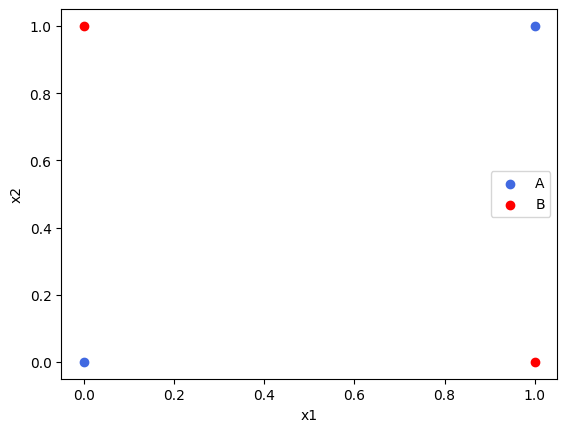

In [30]:
fig,ax = plt.subplots()
ax.scatter(df[df['class']=='A']['x1'],df[df['class']=='A']['x2'],label='A',color='royalblue')
ax.scatter(df[df['class']=='B']['x1'],df[df['class']=='B']['x2'],label='B',color='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.legend()
plt.show()

In [31]:
#Perceptron with Pocktet Algorithm
w_0 = [0.2,0.2]
p_0 = 0.01
solved = False
b =0.1
h_last = len(df)
while solved == False:
    h = 0
    Y = []
    delta = 0
    for i in df.itertuples():
        x_i = i[1:3] 
        if np.dot(x_i,w_0) + b < 0:
            delta = -1
        else:
            delta = 1
        if delta == 1 and i[3] == 0:
            Y.append(x_i) 
            h+=1 
        if delta == -1 and i[3] == 1:
            Y.append(x_i)
            h+=1
    somatorio = [0.0,0.0]
    bias_sum = 0
    for j in Y:
        if np.dot(j,w_0) + b < 0:
            somatorio = np.subtract(somatorio,j)
            bias_sum -= 1
        else:
            somatorio = np.add(somatorio,j)
            bias_sum += 1
    if len(Y) == 0:
        solved = True
    else:
        if h_last >= h:
            w_0 = w_0 - p_0*somatorio
            b = b - p_0 * bias_sum
            h_last = h
        else:
            solved = True
        


In [32]:
def perceptron(w_0,b,df,p_0):
    solved = False
    h_last = len(df)
    while solved == False:
        h = 0
        Y = []
        delta = 0
        for i in df.itertuples():
            x_i = i[1:3] 
            if np.dot(x_i,w_0) + b < 0:
                delta = -1
            else:
                delta = 1
            if delta == 1 and i[3] == 0:
                Y.append(x_i) 
                h+=1 
            if delta == -1 and i[3] == 1:
                Y.append(x_i)
                h+=1
        somatorio = [0.0,0.0]
        bias_sum = 0
        for j in Y:
            if np.dot(j,w_0) + b < 0:
                somatorio = np.subtract(somatorio,j)
                bias_sum -= 1
            else:
                somatorio = np.add(somatorio,j)
                bias_sum += 1
        if len(Y) == 0:
            solved = True
        else:
            if h_last >= h:
                w_0 = w_0 - p_0*somatorio
                b = b - p_0 * bias_sum
                h_last = h
            else:
                solved = True
    return [w_0,b]

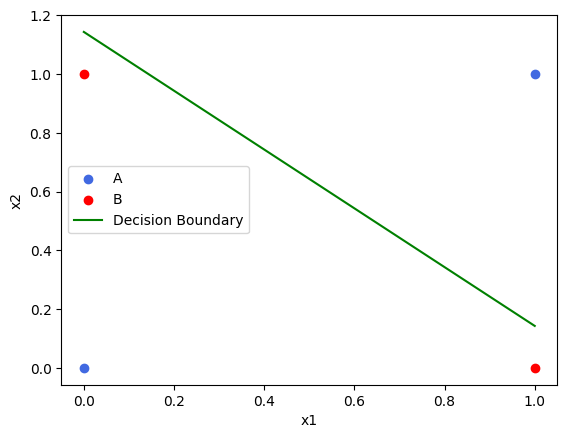

In [33]:

fig,ax = plt.subplots()
ax.scatter(df[df['class']=='A']['x1'],df[df['class']=='A']['x2'],label='A',color='royalblue')
ax.scatter(df[df['class']=='B']['x1'],df[df['class']=='B']['x2'],label='B',color='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# Criação dos pontos de x1 para traçar a reta
x1_values = np.linspace(df['x1'].min(), df['x1'].max(), 100)

# Cálculo de x2 com base na equação da reta
x2_values = -(w_0[0] / w_0[1]) * x1_values - (b / w_0[1])

# Traçar a reta no gráfico
ax.plot(x1_values, x2_values, label='Decision Boundary', color='green')
plt.legend()
plt.show()

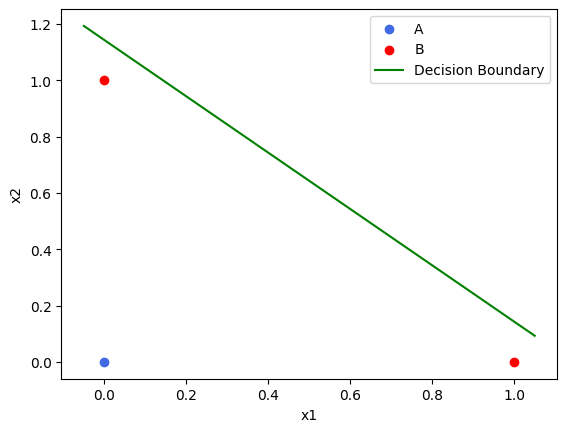

In [34]:
def is_below_decision_boundary(x1, x2, w_0, b_0):
    return x2 < (-w_0[0] / w_0[1]) * x1 - (b_0 / w_0[1])

# Filtrando os pontos abaixo da decision boundary
below_boundary = df[df.apply(lambda row: is_below_decision_boundary(row['x1'], row['x2'], w_0, b), axis=1)]

# Plotando os pontos que estão abaixo da decision boundary
fig, ax = plt.subplots()
ax.scatter(below_boundary[below_boundary['class'] == 'A']['x1'], 
           below_boundary[below_boundary['class'] == 'A']['x2'], 
           label='A', color='royalblue')

ax.scatter(below_boundary[below_boundary['class'] == 'B']['x1'], 
           below_boundary[below_boundary['class'] == 'B']['x2'], 
           label='B', color='red')

# Plotando a decision boundary
x_vals = np.array(ax.get_xlim())  # Pega os limites do eixo x
y_vals = - (w_0[0] / w_0[1]) * x_vals - b / w_0[1]  # Equação da reta
ax.plot(x_vals, y_vals, label='Decision Boundary', color='green')

# Configurações do gráfico
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.legend()
plt.show()

In [35]:
result = perceptron([0.2,0.2],0.1,below_boundary,0.01)
w_1 = result[0]
b1 = result[1]

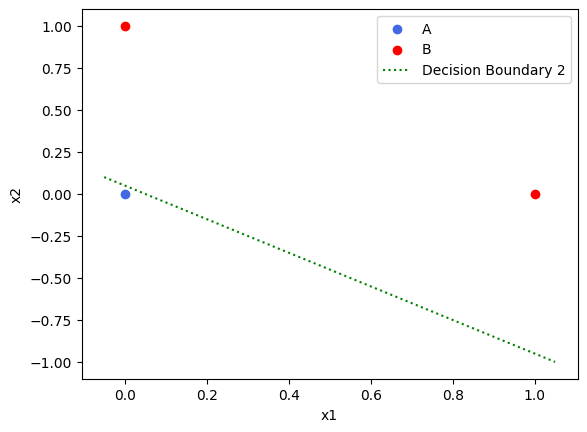

In [36]:
# Plotando os pontos que estão abaixo da decision boundary
fig, ax = plt.subplots()
ax.scatter(below_boundary[below_boundary['class'] == 'A']['x1'], 
           below_boundary[below_boundary['class'] == 'A']['x2'], 
           label='A', color='royalblue')

ax.scatter(below_boundary[below_boundary['class'] == 'B']['x1'], 
           below_boundary[below_boundary['class'] == 'B']['x2'], 
           label='B', color='red')

# Plotando a decision boundary
x_vals = np.array(ax.get_xlim())  # Pega os limites do eixo x
y_vals = - (w_1[0] / w_1[1]) * x_vals - b1 / w_1[1]  # Equação da reta
ax.plot(x_vals, y_vals, label='Decision Boundary 2', color='green',linestyle=':')

# Configurações do gráfico
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.legend()
plt.show()

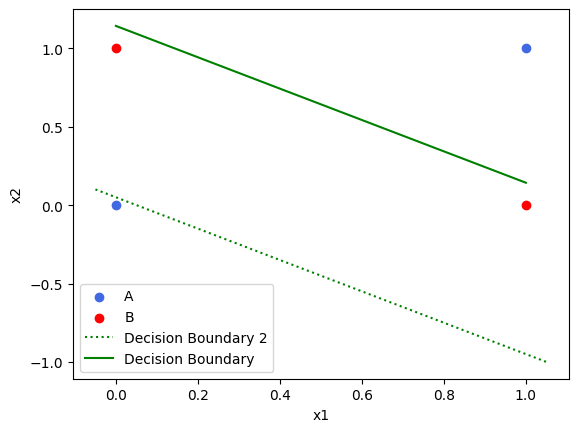

In [37]:
# Plotando os pontos que estão abaixo da decision boundary
fig, ax = plt.subplots()
ax.scatter(df[df['class'] == 'A']['x1'], 
           df[df['class'] == 'A']['x2'], 
           label='A', color='royalblue')

ax.scatter(df[df['class'] == 'B']['x1'], 
           df[df['class'] == 'B']['x2'], 
           label='B', color='red')

# Plotando a decision boundary
x_vals = np.array(ax.get_xlim())  # Pega os limites do eixo x
y_vals = - (w_1[0] / w_1[1]) * x_vals - b1 / w_1[1]  # Equação da reta
ax.plot(x_vals, y_vals, label='Decision Boundary 2', color='green',linestyle=':')
x1_values = np.linspace(df['x1'].min(), df['x1'].max(), 100)

# Cálculo de x2 com base na equação da reta
x2_values = -(w_0[0] / w_0[1]) * x1_values - (b / w_0[1])

# Traçar a reta no gráfico
ax.plot(x1_values, x2_values, label='Decision Boundary', color='green')
# Configurações do gráfico
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.legend()
plt.show()

In [44]:
df['y1'] = df.apply(lambda row: 0 if (row['x1']*w_0[0] + row['x2']*w_0[1] + b) < 0 else 1, axis=1) 
df['y2'] = df.apply(lambda row: 0 if (row['x1']*w_1[0] + row['x2']*w_1[1] + b1) < 0 else 1, axis=1) 
df.head()

,x1,x2,output,class,y1,y2
0,0,0,0,A,0,0
1,0,1,1,B,0,1
2,1,1,0,A,1,1
3,1,0,1,B,0,1


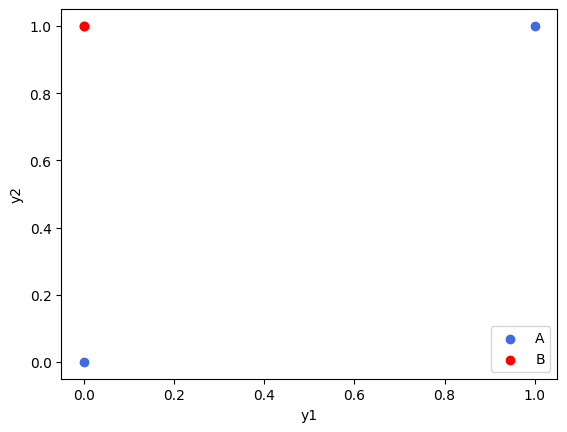

In [45]:
fig,ax = plt.subplots()
ax.scatter(df[df['class']=='A']['y1'],df[df['class']=='A']['y2'],label='A',color='royalblue')
ax.scatter(df[df['class']=='B']['y1'],df[df['class']=='B']['y2'],label='B',color='red')
ax.set_xlabel('y1')
ax.set_ylabel('y2')
plt.legend()
plt.show()

In [46]:
#Perceptron with Pocktet Algorithm
w_2 = [0.2,0.2]
p_2 = 0.01
solved = False
b2 =0.1
while solved == False:
    h = 0
    Y = []
    delta = 0
    for i in df.itertuples():
        x_i = i[5:7] 
        if np.dot(x_i,w_2) + b2 < 0:
            delta = -1
        else:
            delta = 1
        if delta == 1 and i[3] == 0:
            Y.append(x_i) 
            h+=1 
        if delta == -1 and i[3] == 1:
            Y.append(x_i)
            h+=1
    somatorio = [0.0,0.0]
    bias_sum = 0
    for j in Y:
        if np.dot(j,w_2) + b2 < 0:
            somatorio = np.subtract(somatorio,j)
            bias_sum -= 1
        else:
            somatorio = np.add(somatorio,j)
            bias_sum += 1
    if len(Y) == 0:
        solved = True
    else:
            w_2 = w_2 - p_2*somatorio
            b2 = b2 - p_2 * bias_sum
        


In [47]:
print(w_2,b2)

[-0.02  0.08] -0.06999999999999998


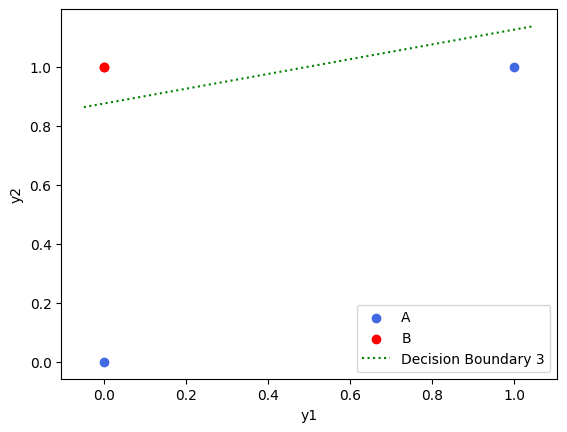

In [50]:
fig,ax = plt.subplots()
ax.scatter(df[df['class']=='A']['y1'],df[df['class']=='A']['y2'],label='A',color='royalblue')
ax.scatter(df[df['class']=='B']['y1'],df[df['class']=='B']['y2'],label='B',color='red')
x_vals = np.array(ax.get_xlim())  # Pega os limites do eixo x
y_vals = - (w_2[0] / w_2[1]) * x_vals - b2 / w_2[1]  # Equação da reta
ax.plot(x_vals, y_vals, label='Decision Boundary 3', color='green',linestyle=':')
ax.set_xlabel('y1')
ax.set_ylabel('y2')
plt.legend()
plt.show()

In [51]:
print(w_0,b)
print(w_1,b1)
print(w_2,b2)

[0.07 0.07] -0.08
[0.2 0.2] -0.00999999999999999
[-0.02  0.08] -0.06999999999999998
